In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

import nltk
from nltk.corpus import stopwords
import re #regular expressions
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_colwidth',150)

In [6]:
# Importeer de dataset en splits op in features en targets

# Inlezen dataset
dataset = pd.read_csv('spam_train.csv')

testset = pd.read_csv('spam_test.csv')

# Opsplitsen in features en targets
y_train = dataset.type.values
X_train = dataset.text.values

y_test = testset.type.values
X_test = testset.text.values

testset.tail(20)
#print(X_train[2])


,type,text
830,ham,Wif my family booking tour package.
831,ham,GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI
832,ham,7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st Ur Lovely Friendship... good morning dear
833,spam,FREE for 1st week! No1 Nokia tone 4 ur mobile every week just txt NOKIA to 8077 Get txting and tell ur mates. www.getzed.co.uk POBox 36504 W45WQ 1...
834,ham,Let me know how it changes in the next 6hrs. It can even be appendix but you are out of that age range. However its not impossible. So just chill ...
835,ham,"Sorry, I'll call you later. I am in meeting sir."
836,ham,"Im in inperialmusic listening2the weirdest track ever by”leafcutter john”-sounds like insects being molested&someone plumbing,remixed by evil men ..."
837,ham,Dare i ask... Any luck with sorting out the car?
838,ham,My birthday is on feb # da. .
839,ham,"Thk shld b can... Ya, i wana go 4 lessons... Haha, can go for one whole stretch..."


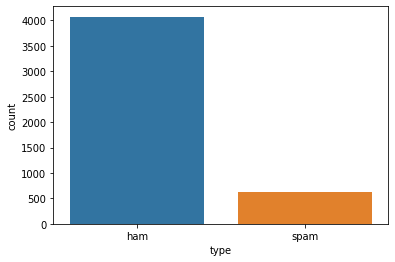

In [7]:
sns.countplot(data=dataset, x='type')

In [3]:
# Text preprocessing

def text_preprocessing(text, language, minWordSize):
    
    # remove html
    text_no_html = BeautifulSoup(str(text),"html.parser" ).get_text()
    
    # remove non-letters
    text_alpha_chars = re.sub("[^a-zA-Z']", " ", str(text_no_html)) 
        
    # convert to lower-case
    text_lower = text_alpha_chars.lower()
    
    # remove stop words
    stops = set(stopwords.words(language)) 
    text_no_stop_words = ' '
    
    for w in text_lower.split():
        if w not in stops:  
            text_no_stop_words = text_no_stop_words + w + ' '
      
       # do stemming
    text_stemmer = ' '
    stemmer = SnowballStemmer(language)
    for w in text_no_stop_words.split():
        text_stemmer = text_stemmer + stemmer.stem(w) + ' '
         
    # remove short words
    text_no_short_words = ' '
    for w in text_stemmer.split(): 
        if len(w) >=minWordSize:
            text_no_short_words = text_no_short_words + w + ' '
 

    return text_no_short_words


In [4]:
# Convert training and test set to bag of words
language = 'english'
minWordLength = 2

for i in range(X_train.size):
    X_train[i] = text_preprocessing(X_train[i], language, minWordLength)
    
    
for i in range(X_test.size):
    X_test[i] = text_preprocessing(X_test[i], language, minWordLength)
    


In [5]:
print(X_train[4707])

 sms ac jsco energi high may know channel day ur leadership skill strong psychic repli an question end repli end jsco 


In [9]:
# Make sparse features vectors 
# Bag of words

count_vect = CountVectorizer()
X_train_bag_of_words = count_vect.fit(X_train)
X_train_bag_of_words = count_vect.transform(X_train)
X_test_bag_of_words = count_vect.transform(X_test)

print(X_train_bag_of_words)
#print(X_test_bag_of_words)

tfidf_transformer = TfidfTransformer()
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_bag_of_words)
X_train_tf = tf_transformer.transform(X_train_bag_of_words)
X_test_tf = tf_transformer.transform(X_test_bag_of_words)
print(X_train_tf)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [7]:
print(X_train_bag_of_words.shape)

(4709, 5742)


In [8]:
# Naive bayes

NBclassifier = MultinomialNB(alpha=1)

NBclassifier.fit(X_train_tf, y_train)

y_pred = NBclassifier.predict(X_test_tf)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       738
        spam       0.99      0.84      0.91       112

   micro avg       0.98      0.98      0.98       850
   macro avg       0.98      0.92      0.95       850
weighted avg       0.98      0.98      0.98       850

[[737   1]
 [ 18  94]]
97.76470588235294


In [9]:
# train a logistic regression classifier
lregclassifier = LogisticRegression(C=10)

lregclassifier.fit(X_train_tf, y_train)

/home/wouter/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# test logistic classifier

y_pred = lregclassifier.predict(X_test_tf)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       738
        spam       0.99      0.92      0.95       112

   micro avg       0.99      0.99      0.99       850
   macro avg       0.99      0.96      0.97       850
weighted avg       0.99      0.99      0.99       850

[[737   1]
 [  9 103]]
98.82352941176471
